In [32]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def readImage(loc):
    img = cv.imread(loc)
    i = cv.resize(img, (475, 650))
    return i   

In [34]:
def showImage(img, title):
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
image = readImage('E:\\progamming\\Machine learning\\internship\\Clustering\\animals\\dog15.jpg')
showImage(image, "DOGGO")

In [35]:
def BGR(img):
    blue = img.copy() 
    green = img.copy() 
    red = img.copy()
    
    blue[:, :, 1:] = 0 
    green[:, :, 0] = 0 
    green[:, :, 2] = 0 
    red[:, :, :2] = 0
    
    img = np.hstack([blue,green,red])
    return img

rgbImg = BGR(image)
showImage(rgbImg, "RGB Channels")

In [36]:
def gray(img):
    i_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return i_gray

grayImg = gray(image)
showImage(grayImg, "Gray Image")

In [37]:
def showHistogram(img, eqIMG):
    plt.figure()
    plt.title("Histogram Comparison")
    plt.xlabel("Intensity Value")
    plt.ylabel("Pixel Count")

    plt.hist(img.ravel(), 256, [0, 256], label='Original', color='red', alpha=0.75)
    plt.hist(eqIMG.ravel(), 256, [0, 256], label='Equalized', color='blue', alpha=0.5)
    plt.legend()
    plt.show()

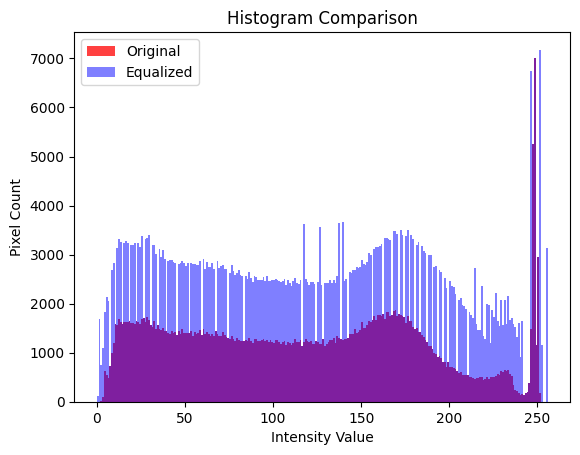

In [38]:
def eqHist(img):
    EQimg = cv.equalizeHist(img)
    img2 = np.hstack([img, EQimg])
    return img2

# def normalizeHist(img):
#     imggg = cv.normalize(img, None, 0, 1, cv.NORM_MINMAX, cv.CV_32F)
#     img2 = np.hstack([img, imggg])
#     return img2


equalized = eqHist(grayImg)
# normal = normalizeHist(grayImg)
showHistogram(grayImg, equalized)
showImage(equalized, "Equalized Gray Image")
# showImage(normal, "Normal Image")

In [39]:
def brightORdark(img):
    M = np.ones(img.shape, dtype='uint8') * 100
    brighter = cv.add(img, M)
    darker = cv.subtract(img, M)
    img2 = np.hstack([img, brighter, darker])
    
    return img2

imggg = brightORdark(grayImg)
showImage(imggg, "Bright & Dark Image")

In [40]:
def negative(img):
    M = np.ones(img.shape, dtype='uint8') * 255
    neg = cv.subtract(M, img)
    img2 = np.hstack([img, neg])
    
    return img2

negImg = negative(grayImg)
showImage(negImg, "Negative Image")

In [41]:
def threshold(img):
    _, thresholded_image = cv.threshold(img, 145, 255, cv.THRESH_BINARY)
    img2 = np.hstack([img, thresholded_image])
    
    return img2

thImg = threshold(grayImg)
showImage(thImg, "Threshold Image")
